In [1]:
import os
import sys
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read log files

In [12]:
#directory = os.path.join(os.getcwd(), 'statistics/')
#directory = '/t1-data/user/asmith/Projects/capturec_dev/capturec_test_run_nc_Hex/run_statistics/'
directory = ''

# Initial duplication statistics

Shows the results of the initial deduplication (based only on exact sequence matches).

In [13]:
df = pd.read_csv(f'{directory}/deduplication/deduplication.summary.csv')
df

,sample,stage,read_type,read_number,stat_type,stat
0,ABM_S1_comb_1,deduplication,pe,0,reads_total,16884018
1,ABM_S1_comb_1,deduplication,pe,0,reads_unique,11264716
2,ABM_S1_comb_1,deduplication,pe,0,reads_removed,5619302
3,ABM_S2_comb_1,deduplication,pe,0,reads_total,14373379
4,ABM_S2_comb_1,deduplication,pe,0,reads_unique,10213676
5,ABM_S2_comb_1,deduplication,pe,0,reads_removed,4159703


In [14]:
N_SAMPLES = df['sample'].nunique()

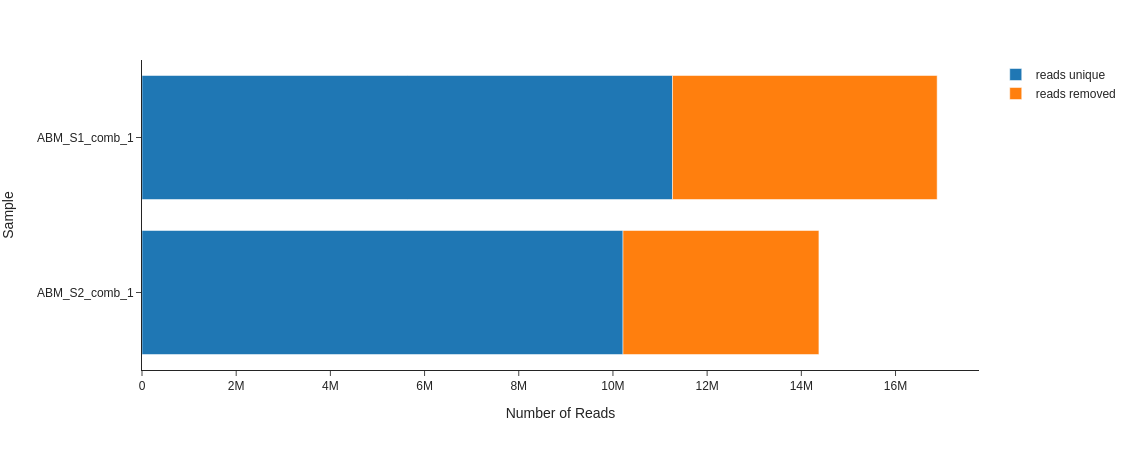

In [15]:
fig = px.bar(data_frame=df.query('stat_type != "reads_total"'),
       x='stat',
       y='sample',
       color='stat_type',
       template='simple_white',
       category_orders={'sample': sorted(df['sample'].unique()),
                        'stat': ['Read_pairs_unique', 'Read_pairs_removed']})
fig.for_each_trace(lambda t: t.update(name=' '.join(t.name.split('_'))))
fig.update_layout(legend_title_text='')
fig.update_yaxes(title='Sample')
fig.update_xaxes(title='Number of Reads')

# Trimming 

In [101]:
df = pd.read_csv('statistics/trimming/trimming.summary.csv')

In [102]:
N_SAMPLES = df['sample'].nunique()

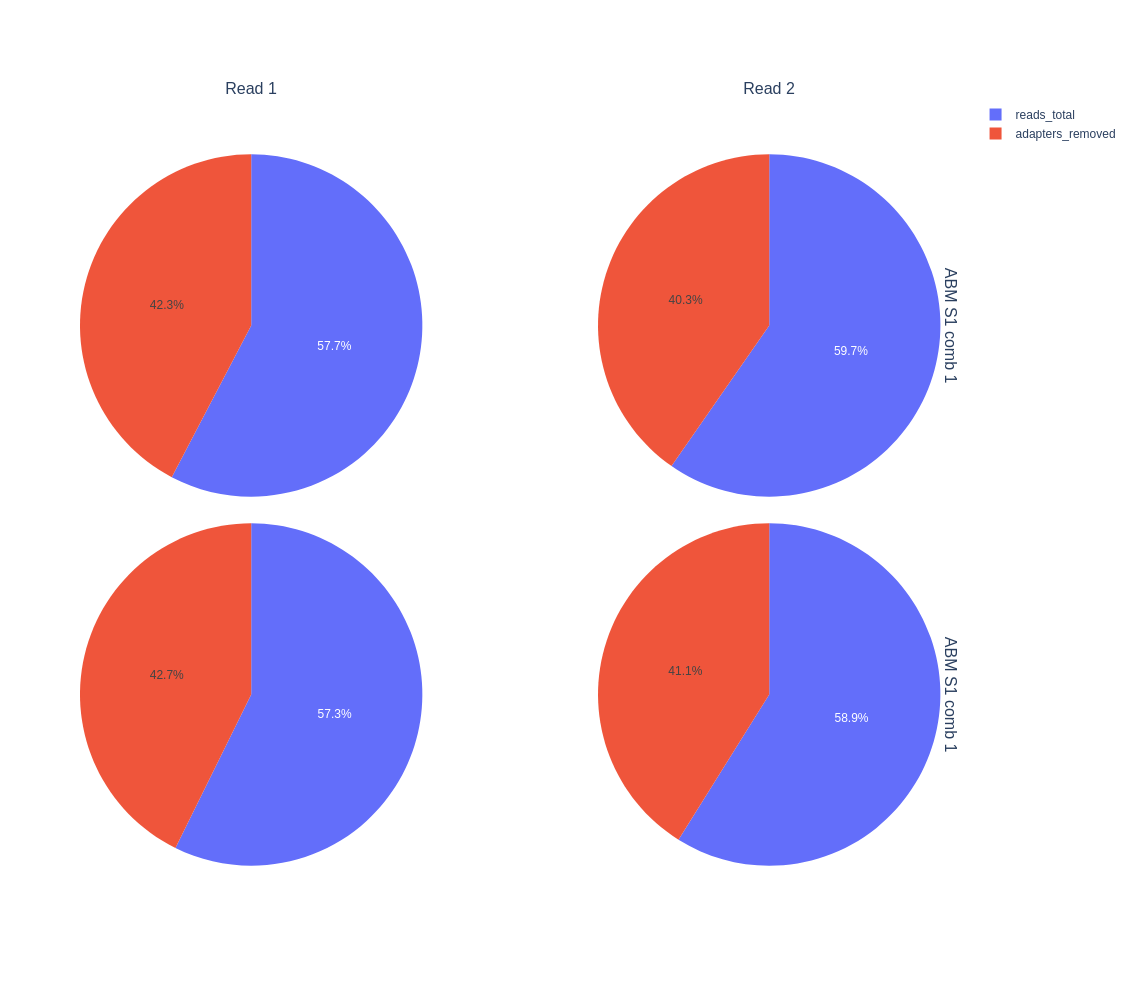

In [103]:
df_summary = df.query('stat_type == "adapters_removed" or stat_type == "reads_total"')
subplot_specs = specs = [[{'type': 'pie'} for i in range(2)] for j in range(N_SAMPLES)]
fig = make_subplots(rows=N_SAMPLES,
                    cols=2,
                    specs=specs,
                    horizontal_spacing=0.2,
                    vertical_spacing=-0.1,
                    row_titles=sorted(df_summary['sample'].str.replace('_', ' ').to_list()),
                    column_titles=['Read 1', 'Read 2'])

for ii, (sample, df_sample) in enumerate(df_summary.groupby('sample')):
    for jj, (read_number, df_read_number) in enumerate(df_sample.groupby('read_number')):
        
        fig.add_trace(go.Pie(labels=df_read_number['stat_type'], 
                             values=df_read_number['stat'],
                             name=f'{sample} {read_number}',
                             domain={'row':1, },),
                      row=ii+1, 
                      col=jj+1)

fig.update_layout(width=1000, height=1000)

In [106]:
df

,sample,read_number,read_type,stat_type,stat
0,ABM_S1_comb_1,1,pe,reads_total,11264716
1,ABM_S1_comb_1,2,pe,reads_total,11264716
2,ABM_S2_comb_1,1,pe,reads_total,10213676
3,ABM_S2_comb_1,2,pe,reads_total,10213676
4,ABM_S1_comb_1,1,pe,adapters_removed,8264358
5,ABM_S1_comb_1,2,pe,adapters_removed,7614809
6,ABM_S2_comb_1,1,pe,adapters_removed,7612136
7,ABM_S2_comb_1,2,pe,adapters_removed,7129835
8,ABM_S1_comb_1,1,pe,reads_after_filtering,11264716
9,ABM_S1_comb_1,2,pe,reads_after_filtering,11264716


# Read pair combination statistics (FLASh)

Shows the number of read pairs combined by FLASh

In [41]:
df = pd.read_csv(directory + '/run_statistics.csv')

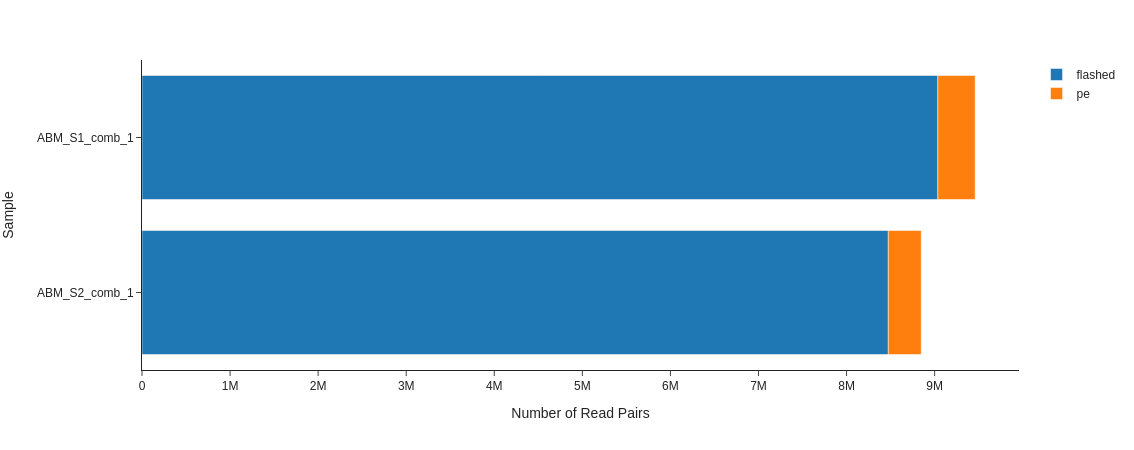

In [42]:
df_summary = (df.loc[df['stage'].isin(['digestion'])]
   .loc[lambda df: df['stat_type'] == 'unfiltered']
   .groupby(['sample', 'stage', 'stat_type', 'read_type'])
   ['stat']
   .mean()
   .reset_index())

fig = px.bar(data_frame=df_summary,
             x='stat',
             y='sample',
             color='read_type',
             template='simple_white',
             category_orders={'sample': sorted(df['sample'])})
fig.update_layout(legend_title_text='')
fig.update_yaxes(title='Sample')
fig.update_xaxes(title='Number of Read Pairs')

# Fastq *in silico* digestion statistics


In [44]:
df_hist = pd.read_csv(directory + '/digestion/digestion.histogram.csv')
df_reads = pd.read_csv(directory + '/digestion/digestion.reads.csv')

## Read pairs with valid slices

Total slices contains all processed reads

Valid slices have been filtered by read length (default >= 18 bp) and Flashed reads are excluded if they do not contain a Restriction Site.

In [46]:
df_reads

,sample,stage,read_type,read_number,stat_type,stat
0,ABM_S1_comb_1,digestion,flashed,1,unfiltered,9036459
1,ABM_S1_comb_1,digestion,flashed,1,filtered,3951404
2,ABM_S1_comb_1,digestion,pe,1,unfiltered,423649
3,ABM_S1_comb_1,digestion,pe,2,unfiltered,423649
4,ABM_S1_comb_1,digestion,pe,1,filtered,423642
5,ABM_S1_comb_1,digestion,pe,2,filtered,423568
6,ABM_S2_comb_1,digestion,flashed,1,unfiltered,8473986
7,ABM_S2_comb_1,digestion,flashed,1,filtered,3524567
8,ABM_S2_comb_1,digestion,pe,1,unfiltered,373928
9,ABM_S2_comb_1,digestion,pe,2,unfiltered,373928


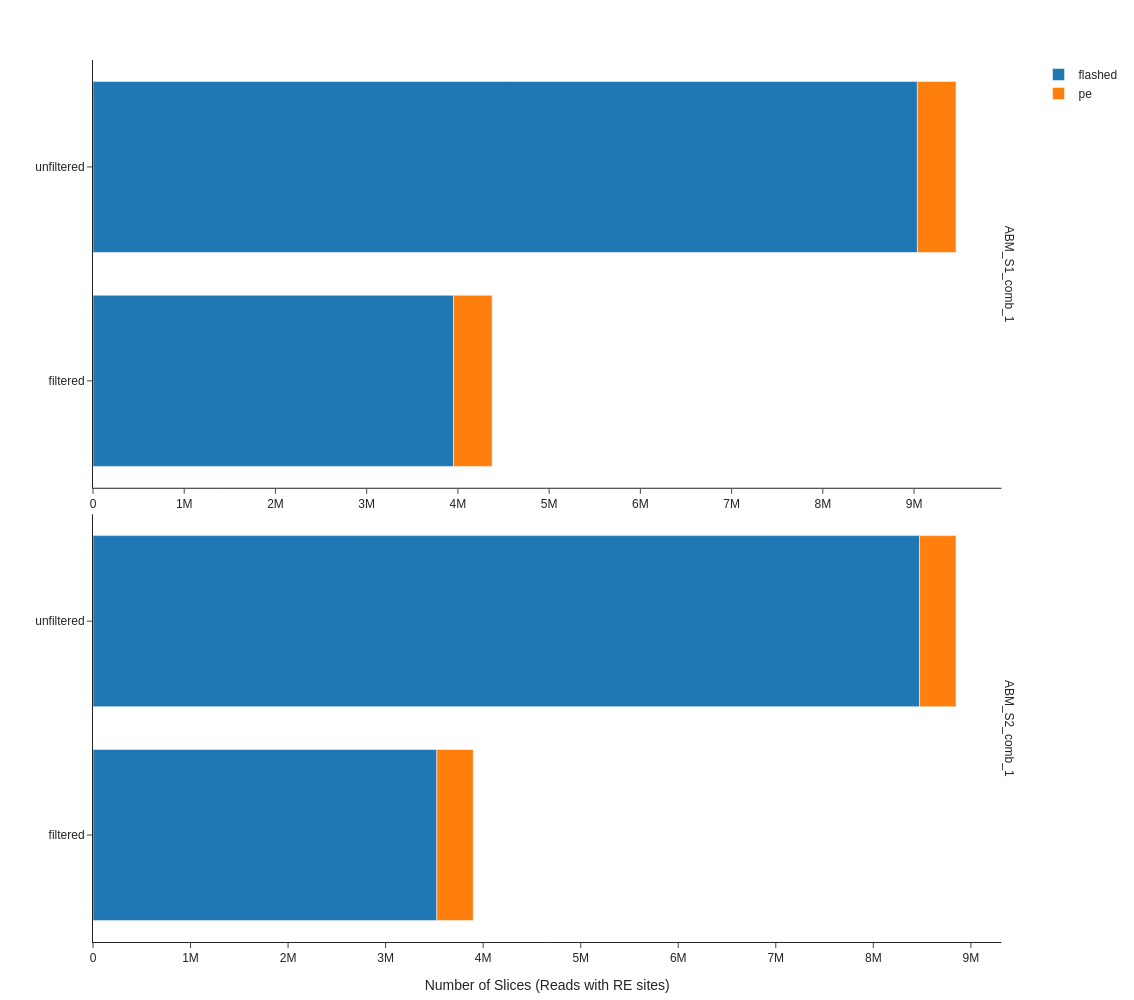

In [55]:
fig = px.bar(data_frame=df_reads.query('read_number != 2'),
             x='stat',
             y='stat_type',
             color='read_type',
             facet_row='sample',
             template='simple_white',
             height=500*N_SAMPLES,
             width=750)
fig.update_layout(legend_title_text='', 
                  margin={'b': 10},
                  )
fig.update_yaxes(title='', autorange='reversed')
fig.update_xaxes(matches=None, showticklabels=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))
fig.layout['xaxis']['title']['text'] = 'Number of Slices (Reads with RE sites)'
fig

## Histogram of digested slices

In [56]:
df_hist

,sample,read_type,read_number,number_of_slices,count,filtered
0,ABM_S1_comb_1,flashed,1,0,5085055,1
1,ABM_S1_comb_1,flashed,1,1,5085020,0
2,ABM_S1_comb_1,flashed,1,1,931762,1
3,ABM_S1_comb_1,flashed,1,2,3344965,0
4,ABM_S1_comb_1,flashed,1,2,2774126,1
...,...,...,...,...,...,...
95,ABM_S2_comb_1,pe,2,6,55,0
96,ABM_S2_comb_1,pe,1,6,1,1
97,ABM_S2_comb_1,pe,1,7,2,0
98,ABM_S2_comb_1,pe,2,7,6,0


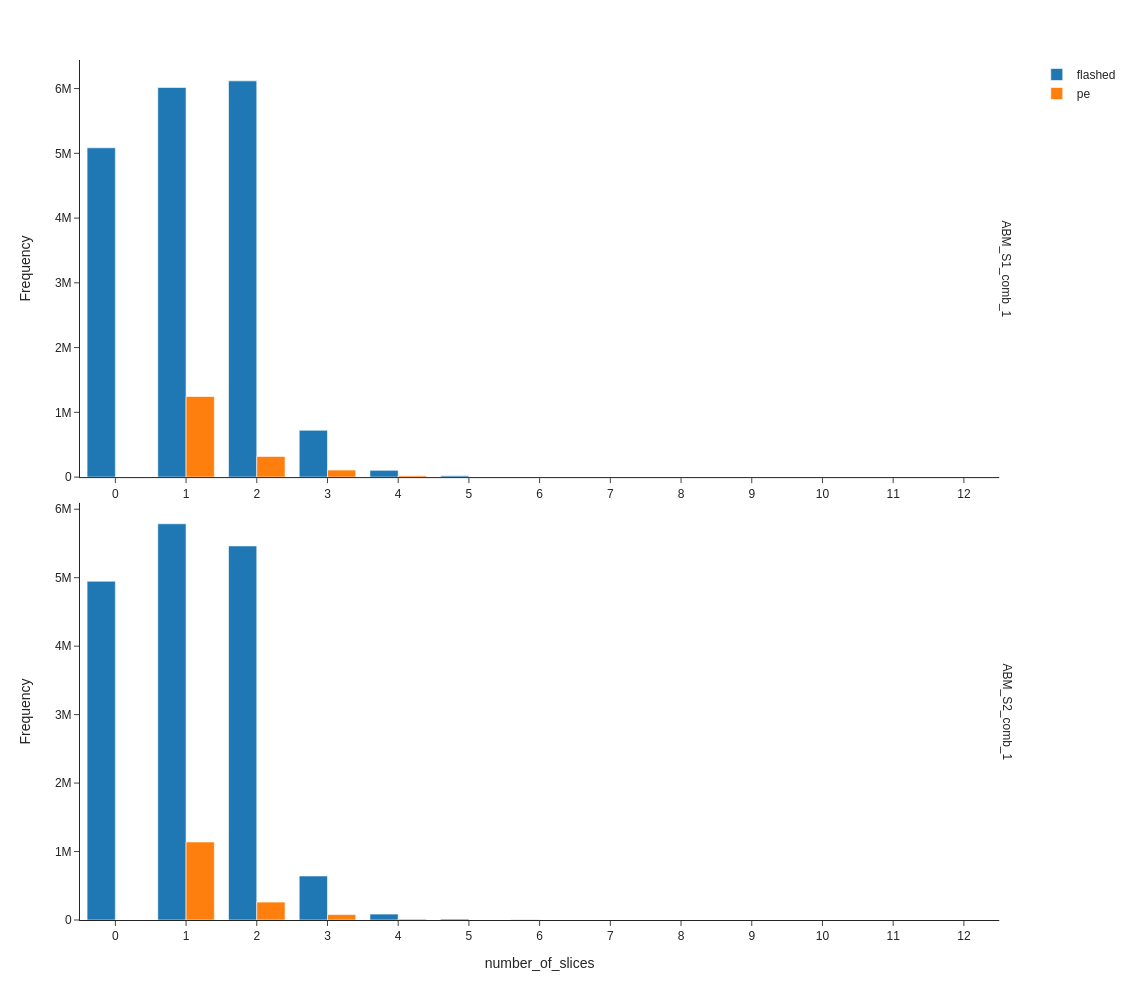

In [61]:
fig = px.histogram(data_frame=df_hist,
             x='number_of_slices',
             y='count',
             color='read_type',
             facet_row='sample',
             template='simple_white',
             barmode='group',
             height=500 * N_SAMPLES,
             width=750,
             hover_data=['count'])

fig.update_layout(legend_title_text='')
fig.update_yaxes(title='Frequency', matches=None, showticklabels=True)
fig.update_xaxes(dtick=1, showticklabels=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# CCanalyser statistics

Summary statistics from ccanalyser, summarised per read pair

In [63]:
df_reads = pd.read_csv(directory + '/ccanalysis/ccanalysis.reads.csv')
df_slices = pd.read_csv(directory + '/ccanalysis/ccanalysis.slices.csv')
df_reporters = pd.read_csv(directory + '/ccanalysis/ccanalysis.reporters.csv')

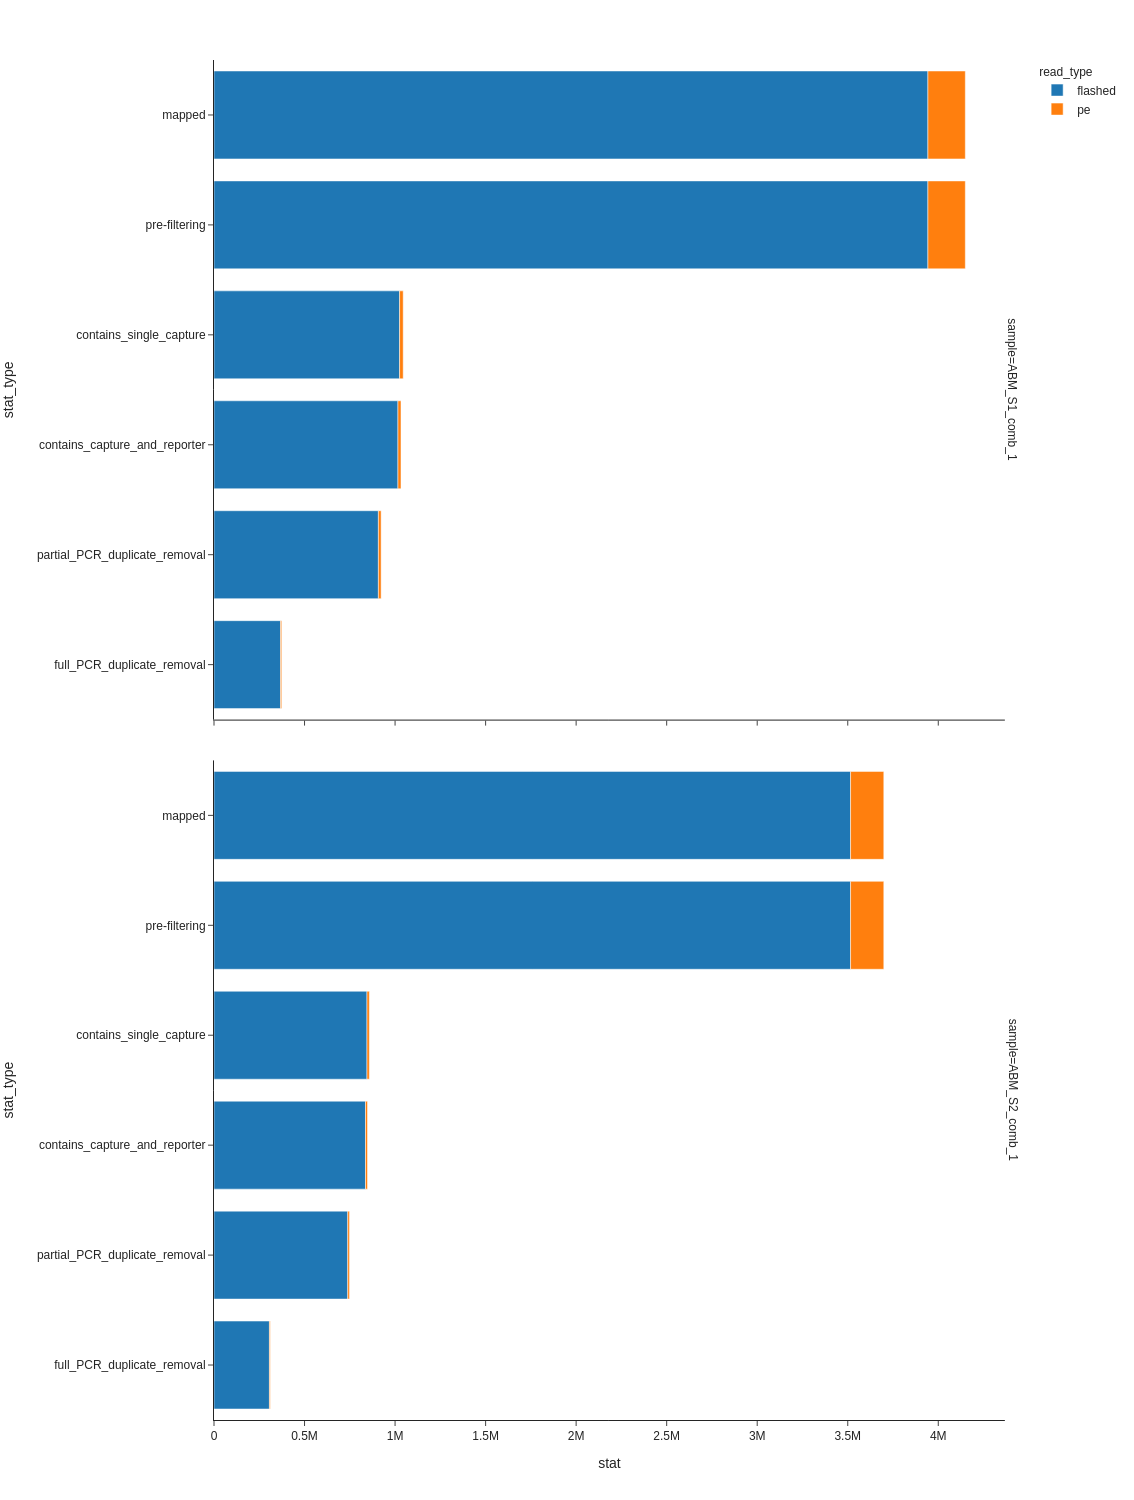

In [75]:
df_reads = (df_reads.sort_values('stat', ascending=False)
                    .query('stat_type != "not-deduplicated"')
                    .replace('duplicate_filtered', 'partial_PCR_duplicate_removal')
                    .replace('deduplicated', 'full_PCR_duplicate_removal'))

px.bar(data_frame=df_reads.sort_values('stat', ascending=False),
             x='stat',
             y='stat_type',
             template='simple_white',
             color='read_type',
             facet_row='sample', 
             category_orders={'stat_type': df_reads['stat_type'].unique()},
             height= 250 * df_reads['stat_type'].nunique(),
             width=500 * N_SAMPLES,
             )

## Capture and reporter statistics

Number of Cis/Trans reporters identified for each capture probe.

In [78]:
df_reporters.head()

,sample,capture,read_type,cis/trans,count
0,ABM_S1_comb_1,Hba-1,flashed,cis,129288
1,ABM_S1_comb_1,Hba-2,flashed,cis,126819
2,ABM_S1_comb_1,Hbb-b2,flashed,cis,111219
3,ABM_S1_comb_1,Slc25A37,flashed,cis,108180
4,ABM_S1_comb_1,Hbb-b2,flashed,trans,89463


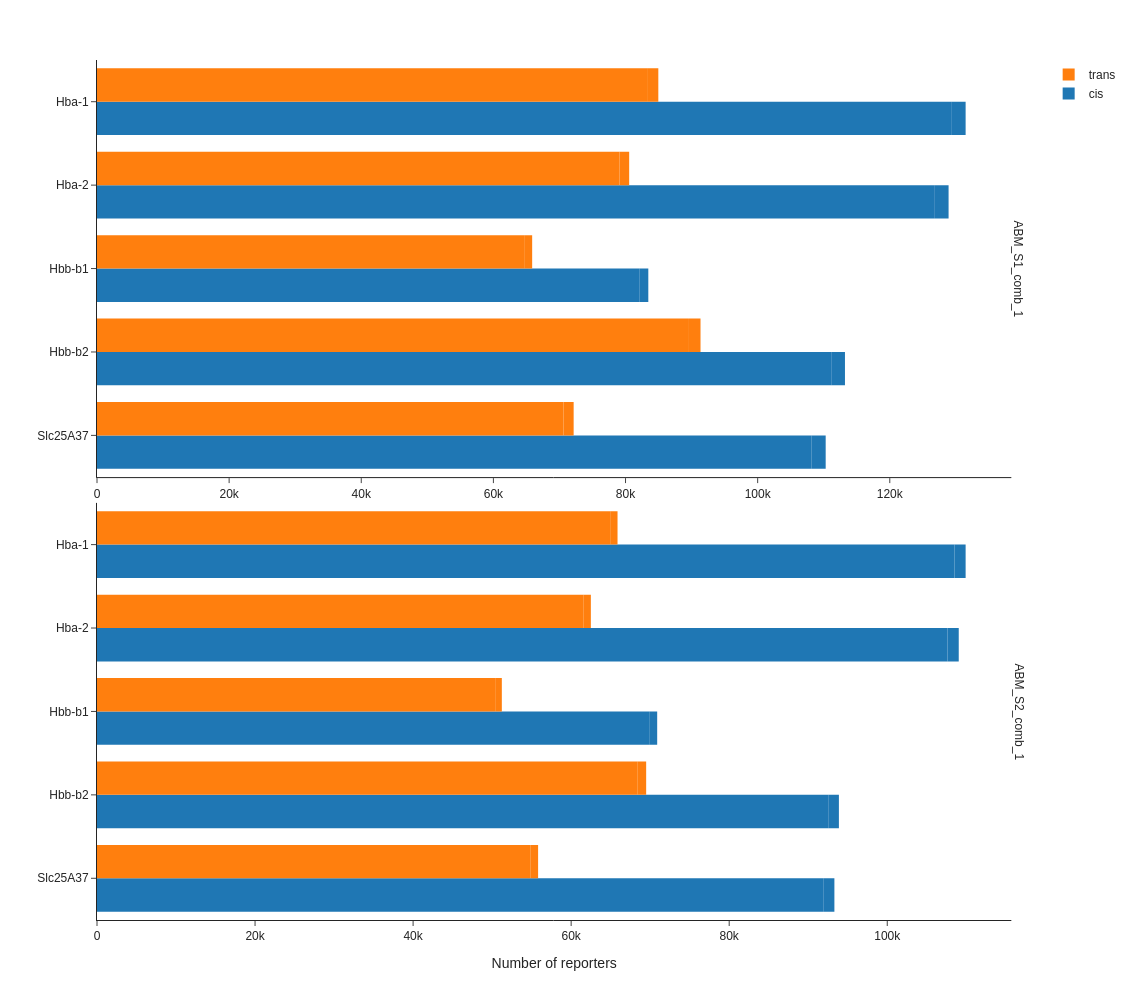

In [85]:
n_probes = df_reporters['capture'].nunique()
fig = px.bar(data_frame=df_reporters,
             x='count',
             y='capture',
             color='cis/trans',
             facet_row='sample',
             barmode='group',
             template='simple_white',
             category_orders={'cis_or_trans': ['trans', 'cis'],
                              'capture': sorted(df_reporters['capture'].unique()),
                              'sample': sorted(df_reporters['sample'].unique())},
             height= 250 + (N_SAMPLES * n_probes * 75),
             width=1000,
             labels={'count': 'Number of reporters'})
fig.update_yaxes(title_text='')
fig.update_xaxes(matches=None, showticklabels=True)
fig.for_each_trace(lambda t: t.update(name=t.name.split('=')[0]))
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))
fig.update_layout(legend={'traceorder':'reversed', 'title': ''})
fig.update_traces(marker_line_width=0)

# Overall stats

Combined statistics from the entire run summarised for each read pair.

In [95]:
df = pd.read_csv(directory + 'run_statistics.csv').sort_values('stat', ascending=False)

In [97]:
stat_type_mapping = {'reads_total':  'Total Reads',
                     'reads_unique': 'PCR Duplicate Filtered (1st pass)',
                     'unfiltered':   'Passed Trimming and Combining',
                     'filtered':     'Contains  a restriction site',
                     'mapped':       'Mapped to reference genome',
                     'contains_single_capture': 'Contains a Capture Slice',
                     'contains_capture_and_reporter': 'Contains a Capture and Reporter Slice',
                     'duplicate_filtered': 'PCR Duplicate Filtered (2nd pass, partial)',
                     'deduplicated': 'PCR Duplicate Filtered (final pass)'}

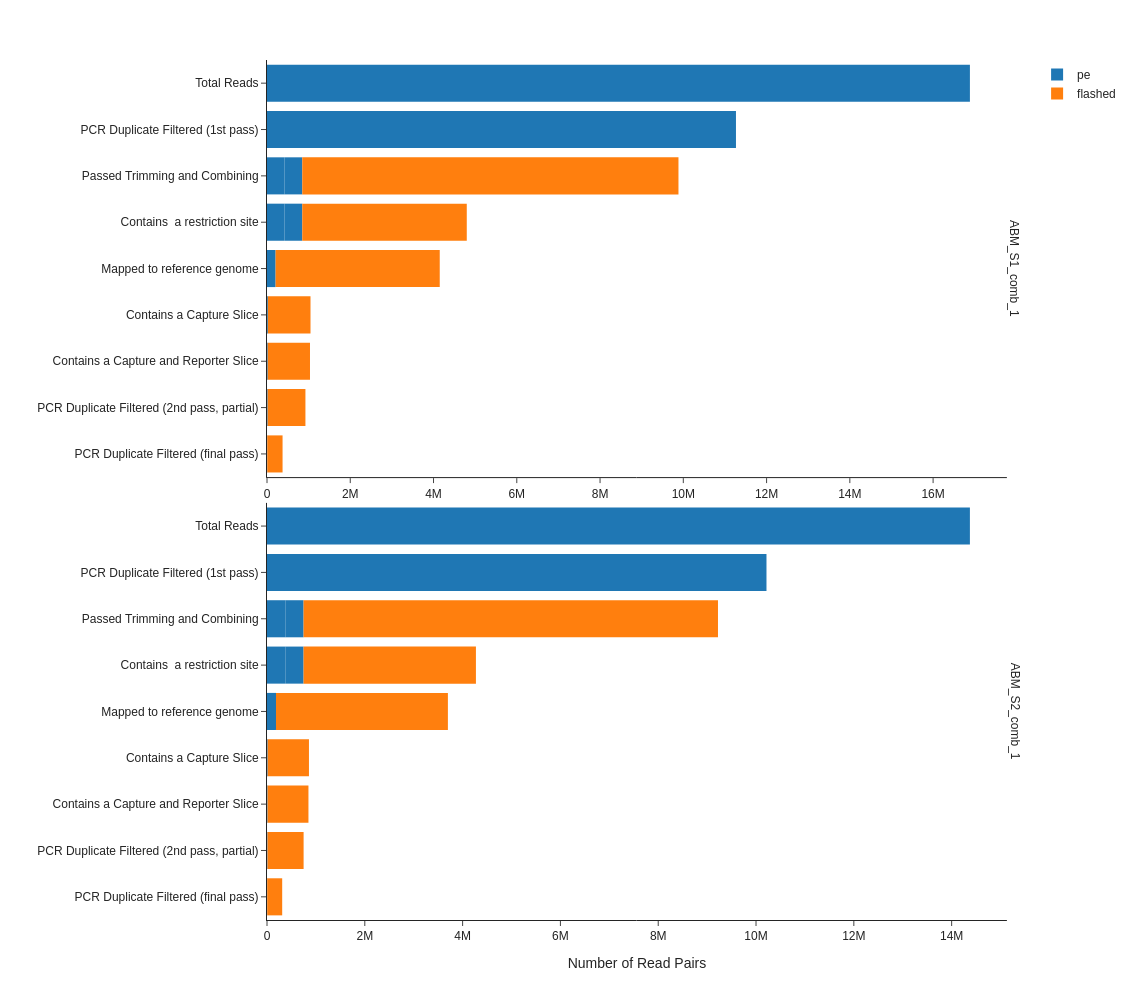

In [100]:
df = df.assign(stat_type=lambda df: df['stat_type'].map(stat_type_mapping))
fig = px.bar(df,
             x='stat',
             y='stat_type',
             color='read_type',
             template='simple_white',
             facet_row='sample',
             height=500 * N_SAMPLES,
             width=1000,
             category_orders={'stat_type': df['stat_type'].unique()})
fig.update_yaxes(title_text='')
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_layout(legend_title_text='')
fig.for_each_annotation(lambda a: a.update(text=f'{a.text.split("=")[1]}'))
fig.layout['xaxis']['title_text'] = 'Number of Read Pairs'
fig.update_traces(marker_line_width=0)
fig